<a href="https://colab.research.google.com/github/abrahammathews2000/Galactic_Globular_Cluster_Distribution/blob/main/Gal_Asg_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import constants
from scipy import special
from scipy import integrate
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from astropy.io import ascii
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.io import fits

from mpl_toolkits import mplot3d

In [ ]:
#data = ascii.read("https://people.smp.uq.edu.au/HolgerBaumgardt/globular/orbits_table.txt",data_start = 2)
#dataG = ascii.read("https://physics.mcmaster.ca/~harris/mwgc_2003.dat")
#data = ascii.read("https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/Gal_asg_3/globular_cluster_6Feb_v5.tsv",header_start = None, data_start = 0, delimiter = ";")
data = ascii.read("https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/Gal_asg_3/globular_cluster_6Feb_v6.tsv",header_start = 0, data_start = 1, delimiter = "|")

print(data)

name = np.array(data["ID"])
X = np.array(data["X"])
Y = np.array(data["Y"])
Z = np.array(data["Z"])
metallicity = np.array(data["[Fe/H]"])


   ID      X     Y     Z   [Fe/H]
-------- ----- ----- ----- ------
 NGC 104   1.8  -2.5  -3.0  -0.76
 NGC 288  -0.1   0.0  -8.1  -1.24
 NGC 362   3.0  -4.9  -6.0  -1.16
NGC 1261   0.1  -9.8 -12.6  -1.35
   Pal 1  -5.9   7.0   3.2   -0.8
    AM 1 -15.9 -77.4 -89.2   -1.8
Eridanus -47.7 -37.4 -53.4  -1.46
   Pal 2 -26.2   4.4  -4.2   -1.3
NGC 1851  -4.3  -9.0  -7.0  -1.26
NGC 1904  -7.5  -8.1  -6.2  -1.54
     ...   ...   ...   ...    ...
NGC 6838   2.1   3.2  -0.3  -0.73
NGC 6864  15.5   5.7  -8.0  -1.32
NGC 6934   8.8  11.3  -4.9  -1.54
NGC 6981  11.6   8.1  -9.1  -1.54
NGC 7006  17.0  34.4 -13.5  -1.68
NGC 7078   3.8   8.2  -4.7  -2.22
NGC 7089   5.5   7.4  -6.7  -1.62
NGC 7099   4.8   2.5  -5.7  -2.12
  Pal 12  10.8   6.4 -13.8  -0.93
  Pal 13   1.0  19.3 -17.9  -1.65
NGC 7492   6.7   9.0 -22.5  -1.51
Length = 139 rows


In [ ]:
'''
fig = plt.figure(figsize = (20,15))
plt.rcParams.update({'font.size': 12})

'''
'''
minMetallicity = np.amin(metallicity)
metallicity = metallicity - minMetallicity
maxMetallicity = np.amax(metallicity)
normalMetallicity = metallicity/maxMetallicity
'''
'''

#print(type(normalMetallicity))
#plot 1:
plt.subplot(2, 2, 3)
plt.scatter(0,0,color = "darkorange",edgecolors='black',label="Sun",s=300)
plt.scatter(X,Z,c = metallicity,cmap = 'Blues',edgecolors='black',s=80)
cbar= plt.colorbar()
cbar.set_label("Metallicity [Fe/H]", labelpad=+1)

#plt.scatter(8,0, color = 'red', s = 300,label="Center of the Galaxy")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Top View (X vs Y)")
plt.grid()
plt.legend()

#plot 2:
plt.subplot(2, 2, 1)
#plt.scatter(X,Z,c = normalMetallicity)
plt.scatter(X,Z,c = metallicity,cmap = 'Blues',edgecolors='black',s=80)
cbar= plt.colorbar()
cbar.set_label("Metallicity [Fe/H]", labelpad=+1)

plt.scatter(0,0,color = "darkorange",edgecolors='black',label="Sun",s=300)
#plt.scatter(8,0, color = 'red', s = 300,label="Center of the Galaxy")

plt.xlabel("X")
plt.ylabel("Z")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("Side View (X vs Z)")
plt.grid()
plt.legend()

#plot 3:
plt.subplot(2, 2, 4)
#plt.scatter(X,Z,c = normalMetallicity)
plt.scatter(Y,Z,c = metallicity,cmap = 'Blues',edgecolors='black',s=80)
cbar= plt.colorbar()
cbar.set_label("Metallicity [Fe/H]", labelpad=+1)

plt.scatter(0,0,color = "darkorange",edgecolors='black',label="Sun",s=300)
#plt.scatter(8,0, color = 'red', s = 300,label="Center of the Galaxy")

plt.xlabel("Y")
plt.ylabel("Z")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("Front View (Y vs Z)")
plt.grid()
plt.legend()


# ---

#----


plt.show()
'''

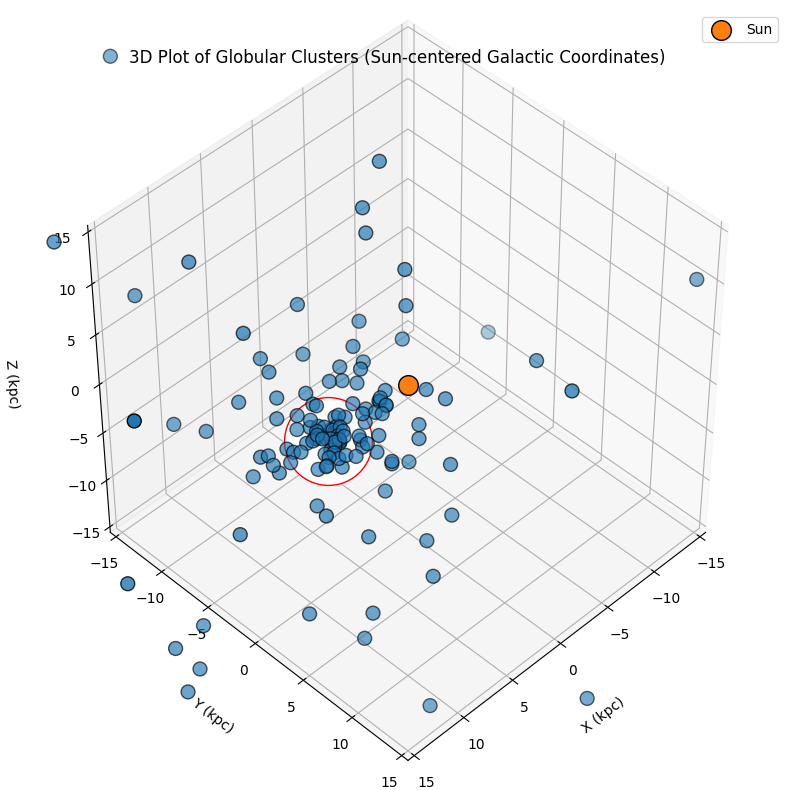

In [ ]:
fig = plt.figure(figsize = (10, 10))

plt.style.use('default')
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(0, 0,0, c = 'tab:orange', edgecolors='black',s = 200,label="Sun")
ax.scatter(X, Y, Z, c = "tab:blue",edgecolors='black', s = 100)
#ax.scatter(8, 0,0, c = 'tab:orange', s = 200,label="Center of the Galaxy")

#cbar.set_label("Metallicity [Fe/H]", labelpad=+1)
ax.scatter(8, 0,0, c = 'white', edgecolors='red',s = 4000)

ax.set_title('3D Plot of Globular Clusters (Sun-centered Galactic Coordinates)')

# Set axes label
ax.set_xlabel('X (kpc)', labelpad=20)
ax.set_ylabel('Y (kpc)', labelpad=20)
ax.set_zlabel('Z (kpc)', labelpad=20)
plt.legend()
plt.xlim(-15,15)
plt.ylim(-15,15)
ax.set_zlim(-15,15)
ax.view_init(45,45)
plt.rcParams.update({'font.size': 15})
plt.show()

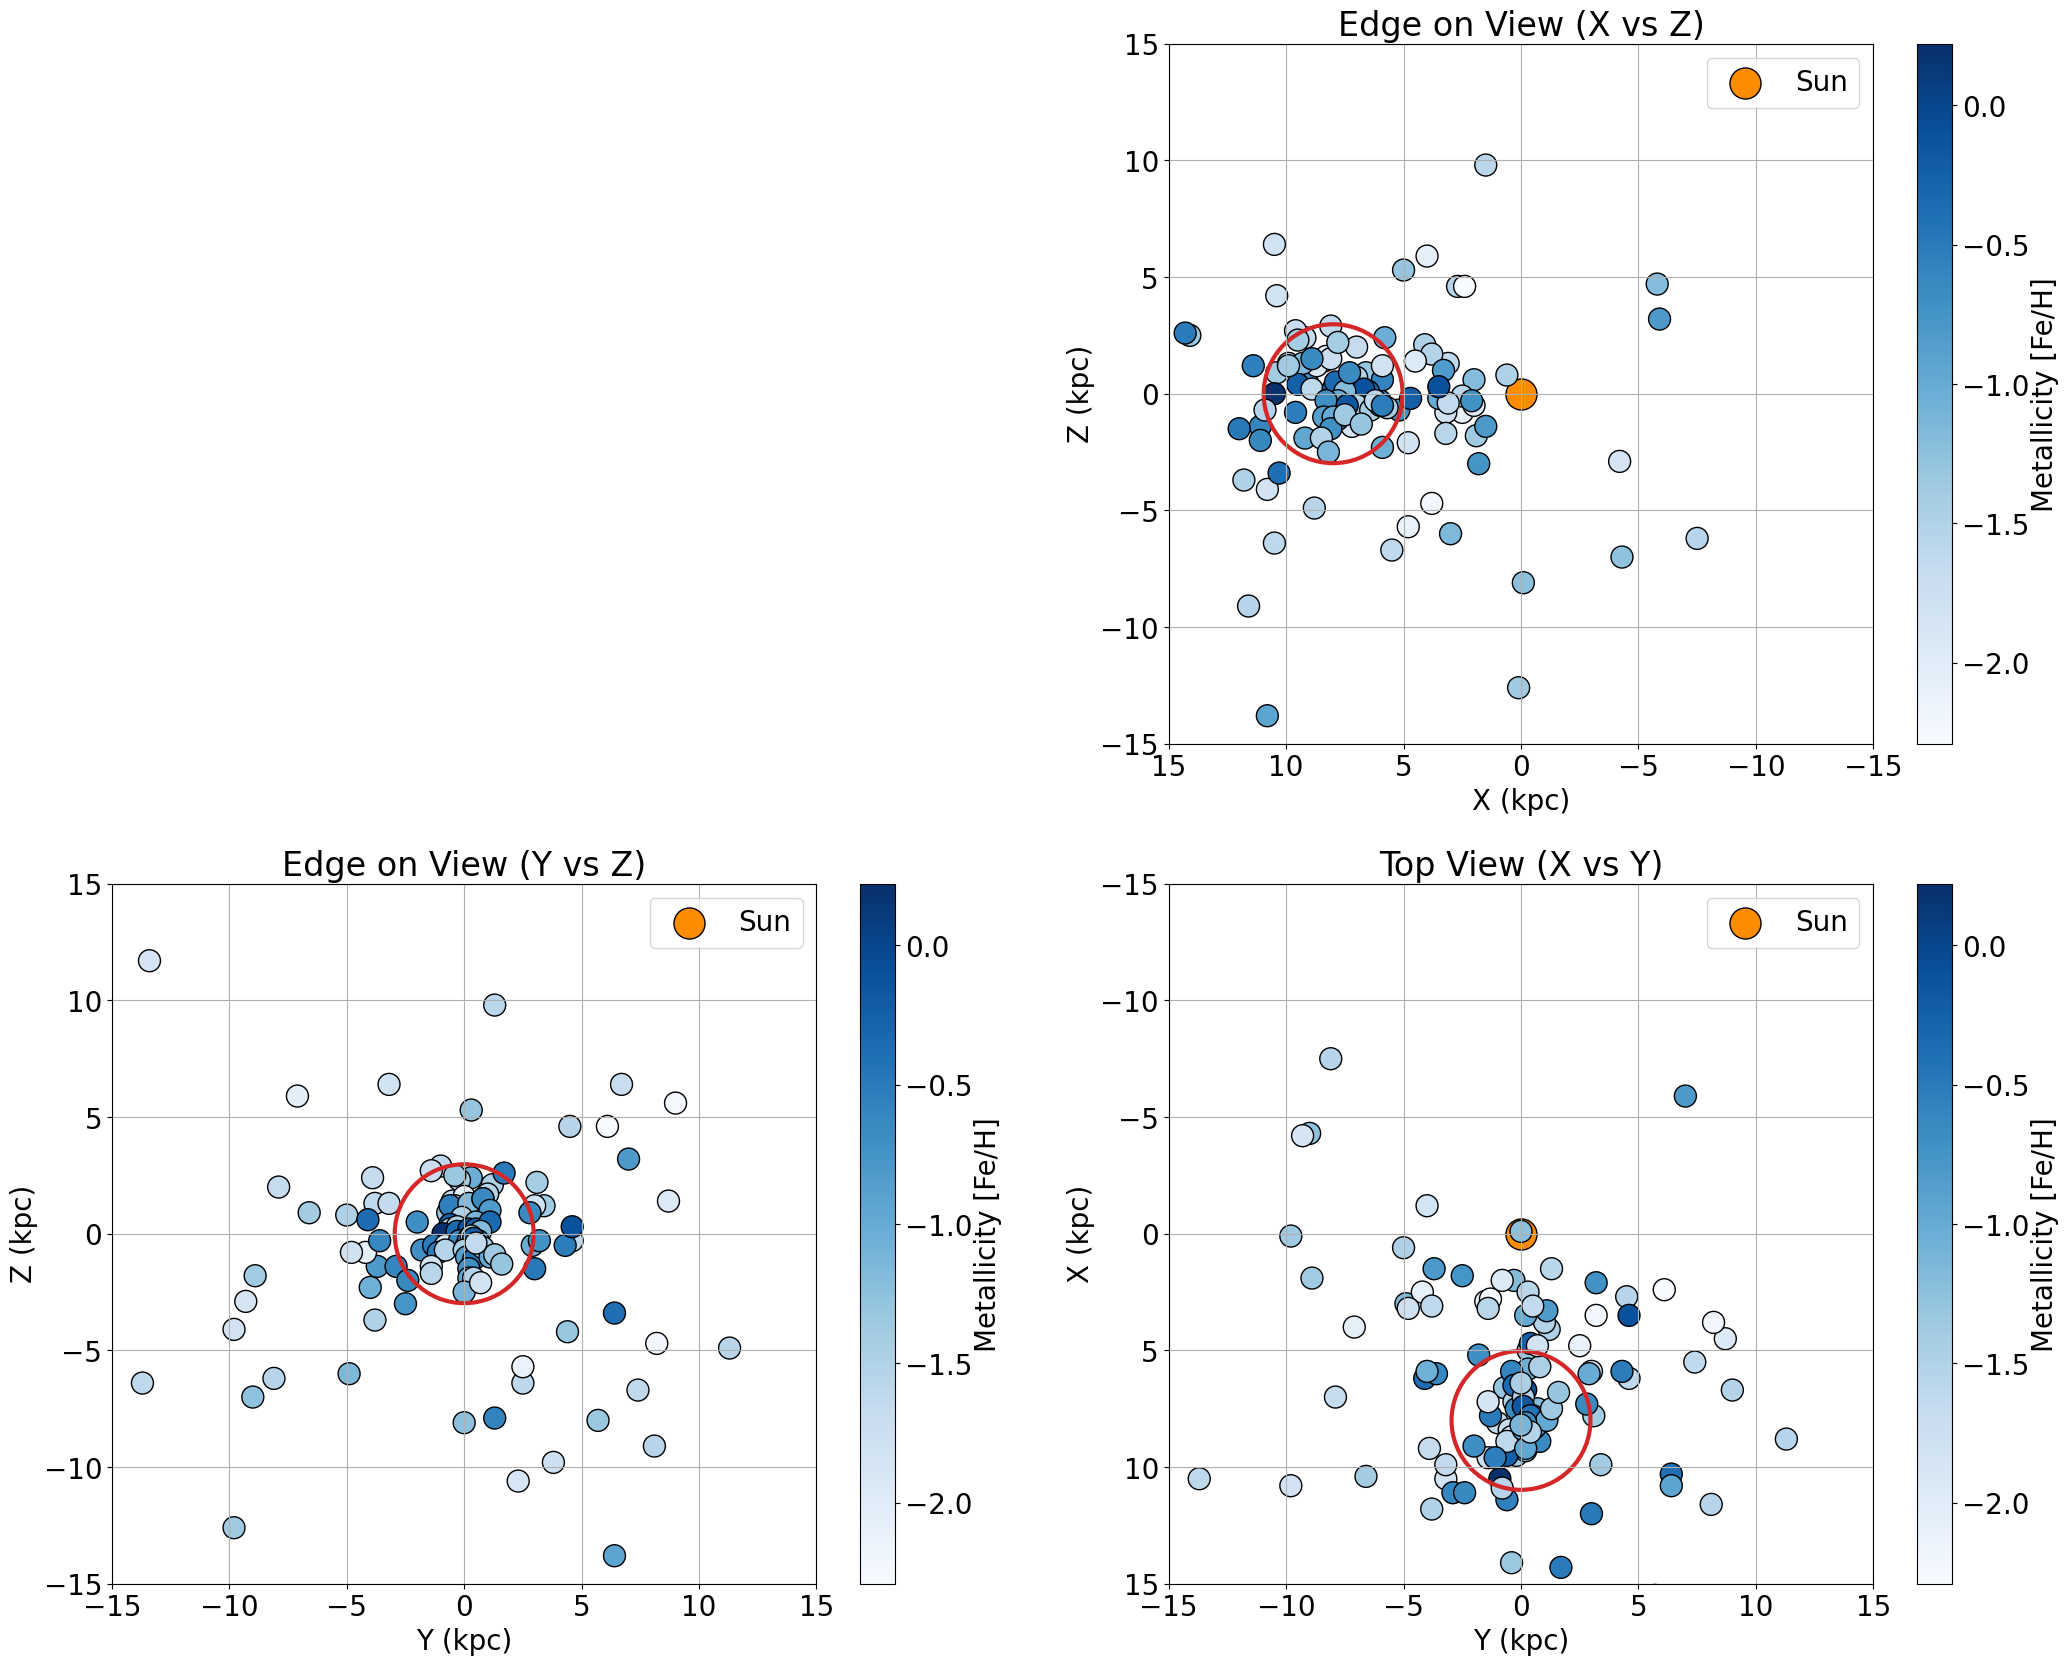

In [ ]:
# pLOT V2

fig = plt.figure(figsize = (25,20))
plt.rcParams.update({'font.size': 20})

'''
minMetallicity = np.amin(metallicity)
metallicity = metallicity - minMetallicity
maxMetallicity = np.amax(metallicity)
normalMetallicity = metallicity/maxMetallicity
'''

#print(type(normalMetallicity))
#plot 1:
plt.subplot(2, 2, 4)
#plt.scatter(0, 8, s = 10000, linewidths=3,facecolors='none', edgecolors='black')
plt.scatter(0,0,color = "darkorange",edgecolors='black',label="Sun",s=500)
plt.scatter(Y,X,c = metallicity,cmap = 'Blues',edgecolors='black',s=250)
cbar= plt.colorbar()
cbar.set_label("Metallicity [Fe/H]", labelpad=+1)

#plt.scatter(8,0, color = 'red', s = 300,label="Center of the Galaxy")
plt.xlim(-15,15)
plt.ylim(15,-15)
plt.xlabel("Y (kpc)")
plt.ylabel("X (kpc)")
plt.title("Top View (X vs Y)")
plt.grid()
plt.scatter(0, 8, s = 10000, linewidths=3,facecolors='none', edgecolors='tab:red')
#plt.scatter(np.average(Y), np.average(X), s = 10000, linewidths=3,facecolors='none', edgecolors='black')

plt.legend()

#plot 2:
plt.subplot(2, 2, 2)
#plt.scatter(X,Z,c = normalMetallicity)
plt.scatter(0,0,color = "darkorange",edgecolors='black',label="Sun",s=500)
plt.scatter(X,Z,c = metallicity,cmap = 'Blues',edgecolors='black',s=250)

cbar= plt.colorbar()
cbar.set_label("Metallicity [Fe/H]", labelpad=+1)

#plt.scatter(8,0, color = 'red', s = 300,label="Center of the Galaxy")

plt.xlabel("X (kpc)")
plt.ylabel("Z (kpc)")
plt.xlim(15,-15)
plt.ylim(-15,15)
plt.title("Edge on View (X vs Z)")
plt.scatter(8, 0, s = 10000, linewidths=3,facecolors='none', edgecolors='tab:red')
plt.grid()
plt.legend()

#plot 3:
plt.subplot(2, 2, 3)
#plt.scatter(X,Z,c = normalMetallicity)
plt.scatter(0,0,color = "darkorange",edgecolors='black',label="Sun",s=500)
plt.scatter(Y,Z,c = metallicity,cmap = 'Blues',edgecolors='black',s=250)
cbar= plt.colorbar()
cbar.set_label("Metallicity [Fe/H]", labelpad=+1)

#plt.scatter(8,0, color = 'red', s = 300,label="Center of the Galaxy")

plt.xlabel("Y (kpc)")
plt.ylabel("Z (kpc)")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("Edge on View (Y vs Z)")
plt.grid()
plt.scatter(0, 0, s = 10000, linewidths=3,facecolors='none', edgecolors='tab:red')

plt.legend()


# ---

#----


plt.show()